## Imports

In [33]:
%matplotlib inline

import bz2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import dill
matplotlib.rcParams['figure.figsize'] = [8, 6]

%load_ext autoreload
%autoreload 2

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum, FitExperiment
import xrdfit.spectrum_fitting as spectrum_fitting
import analysis_functions

from scipy.signal import medfilt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initial fit

Give the angle of the first cake:

In [386]:
first_cake_angle = 90

Load the data:

Diffraction pattern successfully loaded from file.


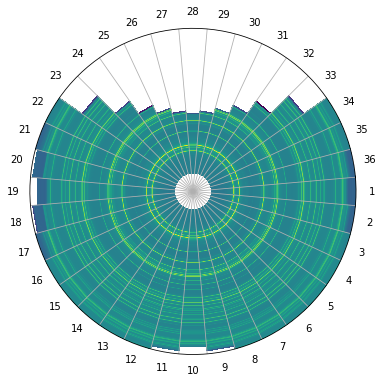

In [387]:
spectral_data = FitSpectrum('../data/sample_2_tension/Strain_00001.dat', first_cake_angle)
spectral_data.plot_polar()

Choose the cakes to fit:

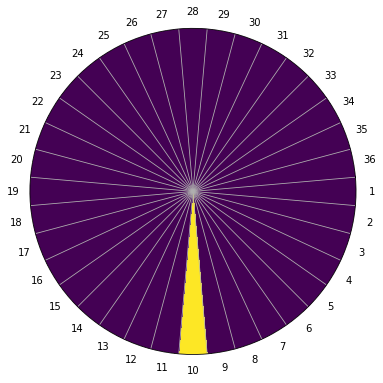

In [497]:
cakes_to_fit = [10]
spectral_data.highlight_cakes(cakes_to_fit)

Plot the spectra:

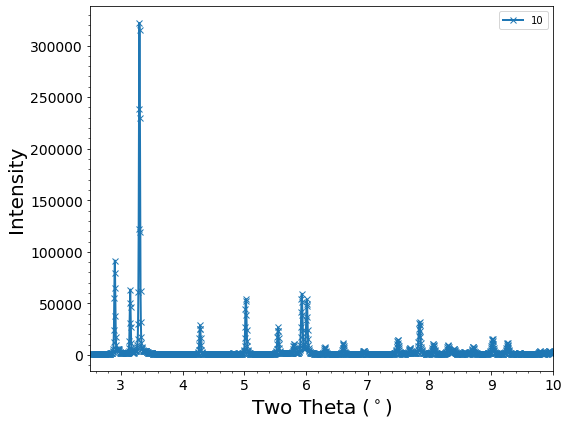

In [498]:
spectral_data.plot(cakes_to_fit, x_range=(2.5, 10), show_points=True)

Set the peak parameters:

Zr hexagonal peaks are defined by (hkil)

Hydrides are defined by (hkl)

There are slight differences in the peak centres between the different cakes, so try cakes at 90 degrees to each other to cover the full range of possible starting peak parameters. The alternative is to save the peak parameters for each cake separately, which would make the maxima bounds smaller and possibly improve the fit.

In [499]:
peak_params = [
               PeakParams((2.7, 3.1), ['(10-10)', '(111)'], [(2.892, 2.91), (2.950, 2.965)]),
               PeakParams((3.05, 3.20), ['(0002)']),
               PeakParams((3.22, 3.42), ['(10-11)']),
               PeakParams((4.10, 4.50), ['(10-12)']),
               PeakParams((4.65, 5.35), ['(220)', '(11-20)'], [(4.80, 4.84), (5.01, 5.04)]),
               PeakParams((5.4, 6.15), ['(10-13)', '(311)', '(20-20)', '(11-22)', '(20-21)'], [(5.5332, 5.558), (5.635, 5.67), (5.79, 5.82), (5.925, 5.945), (6.005, 6.025)]),
#                
#                PeakParams((5.4, 6.15), ['(311)', '(20-20)', '(11-22)', '(20-21)'], [(5.635, 5.66), (5.77, 5.81), (5.83, 5.96), (5.96, 6.04)]), # use if (10-13) is too weak
#                PeakParams((6.20, 7.0), ['(20-22)']) # 0004 is too weak # cake 10 shows 2 peaks either side of this peak I will leave it out for now
               ]

Check the initial fits to constrain the peak parameters:

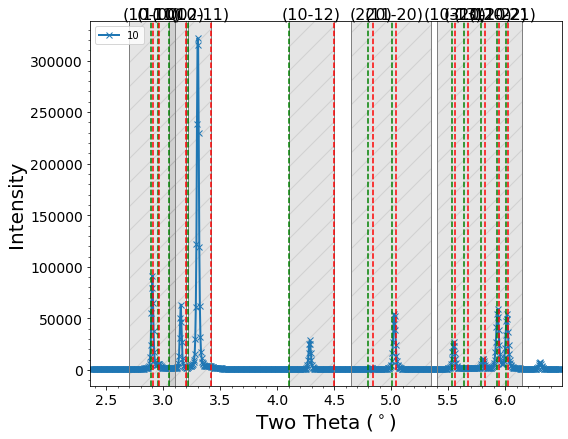

Fitting complete.


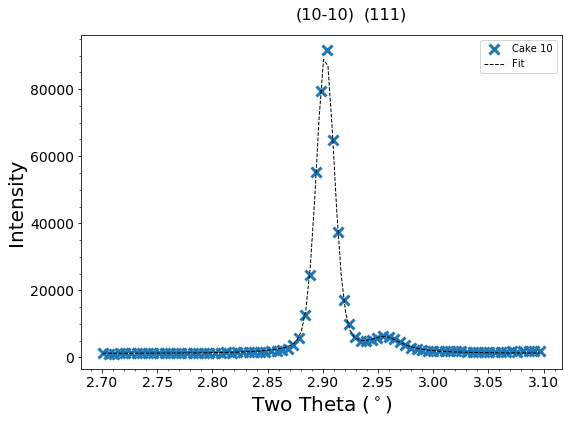

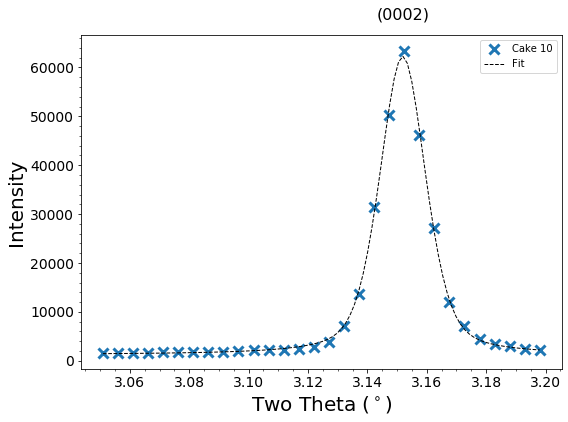

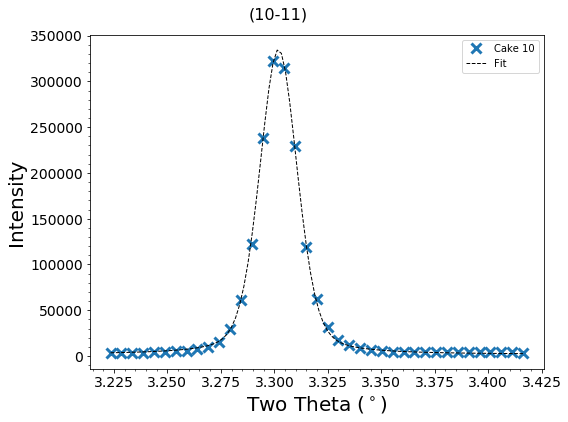

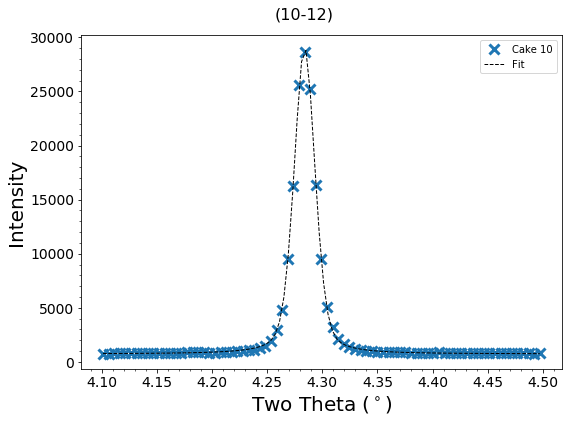

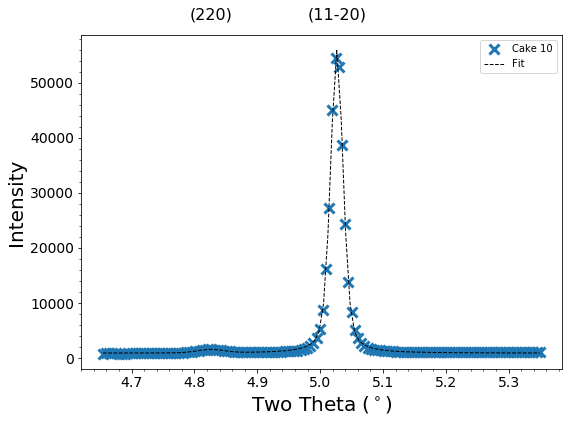

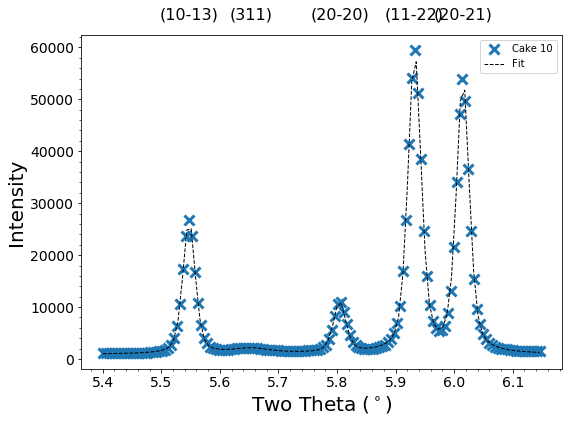

In [500]:
spectral_data.plot_peak_params(peak_params, cakes_to_fit, show_points=True)
spectral_data.fit_peaks(peak_params, cakes_to_fit, merge_cakes=False)

spectral_data.plot_fit('(10-10) (111)')
spectral_data.plot_fit('(0002)')
spectral_data.plot_fit('(10-11)')
spectral_data.plot_fit('(10-12)')
spectral_data.plot_fit('(220) (11-20)')
spectral_data.plot_fit('(10-13) (311) (20-20) (11-22) (20-21)')

# spectral_data.plot_fit('(20-22)') # 0004 is too weak

Save/Load the peak parameters:

In [514]:
# define a file name to store the peak parameters
peak_params_file_name = "peak_parameters/peak_params_sample_2_tension_general.dump"

In [515]:
# save the peak parameters
with bz2.open(peak_params_file_name, 'wb') as output_file:
    dill.dump(peak_params, output_file)

In [516]:
# load the peak parameters
with bz2.open(peak_params_file_name, "rb") as input_file:
    peak_params = dill.load(input_file)

## Run a single refinement

User inputs:

In [501]:
# give the frame time in seconds
frame_time = 1
# define the file path
file_string = '../data/sample_2_tension/Strain_{:05d}.dat'
# set merge cakes to false for multiple points
merge_cakes = False

# define which frames to fit
frames_to_fit = list(range(0, 59, 1))

Run the refinement:

In [502]:
experiment = FitExperiment(frame_time, file_string, first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)
# reuse fits for multiple peaks
experiment.run_analysis(reuse_fits=True)

Processing 59 diffraction patterns.



Analysis complete.
The following fits took over 500 fitting iterations. The quality of these fits should be checked.
1.7% of fits for peak (10-10) (111)
1.7% of fits for peak (220) (11-20)
22.0% of fits for peak (10-13) (311) (20-20) (11-22) (20-21)


Check the fittings:

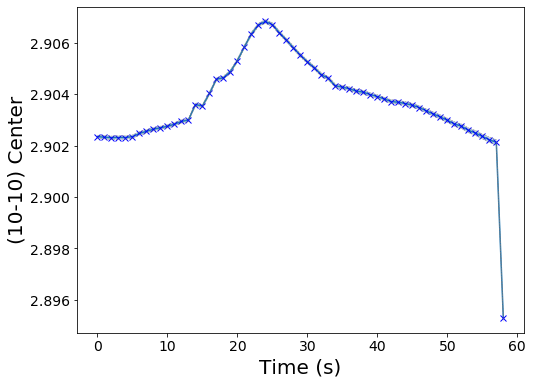

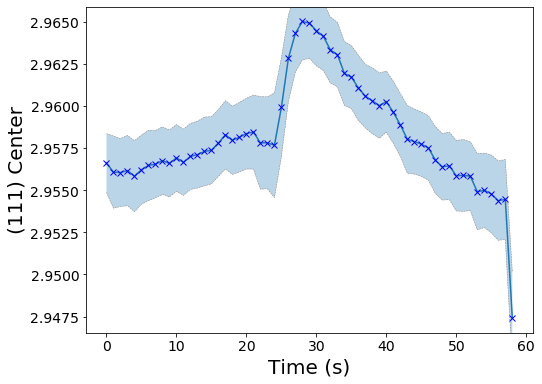

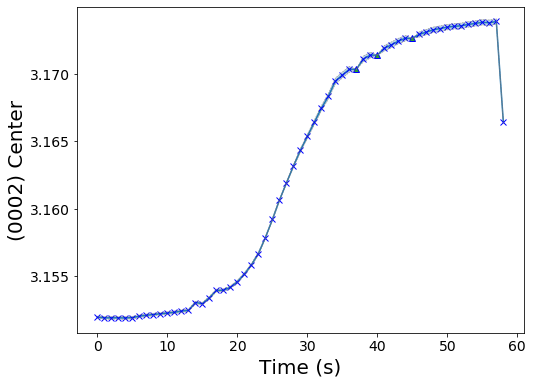

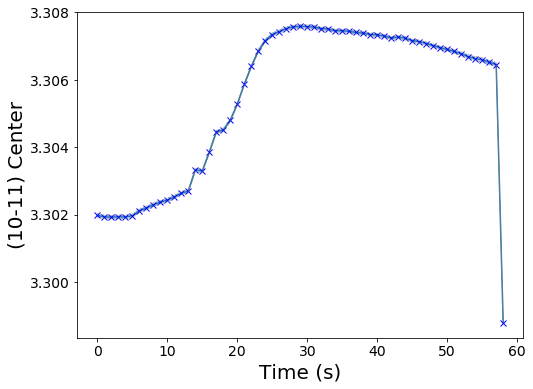

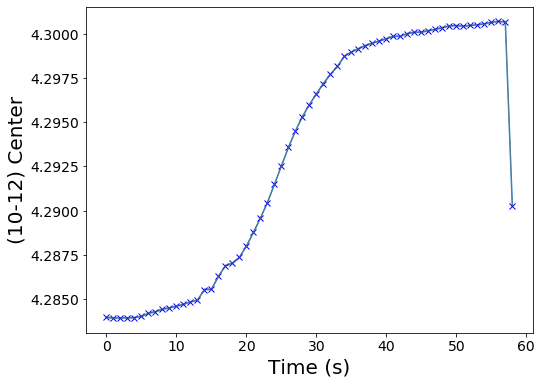

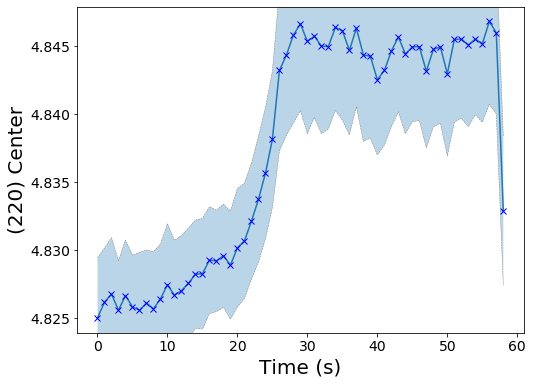

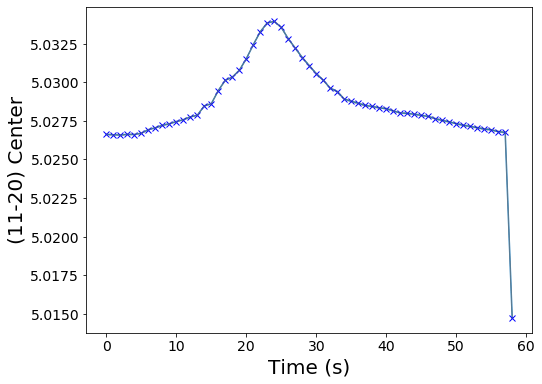

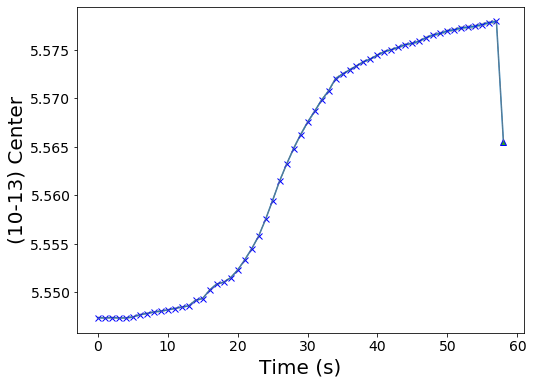

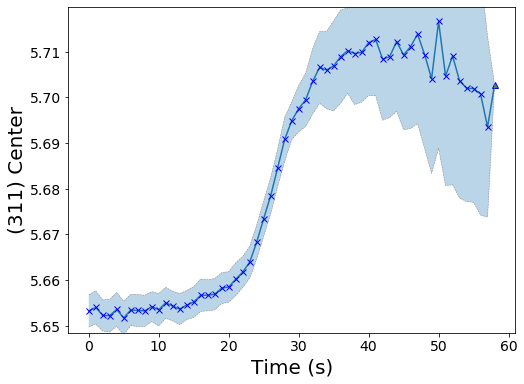

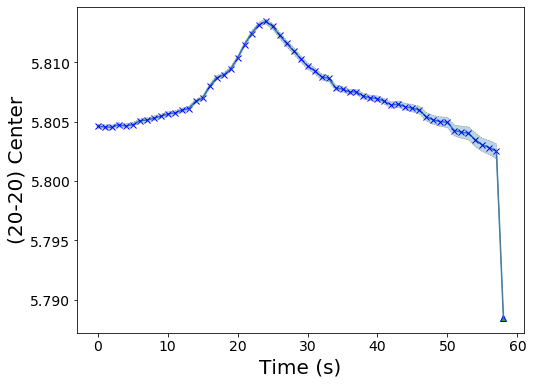

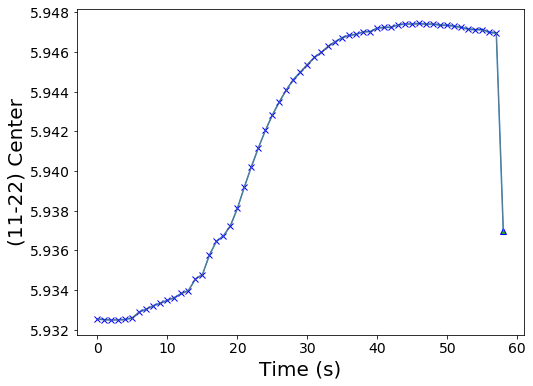

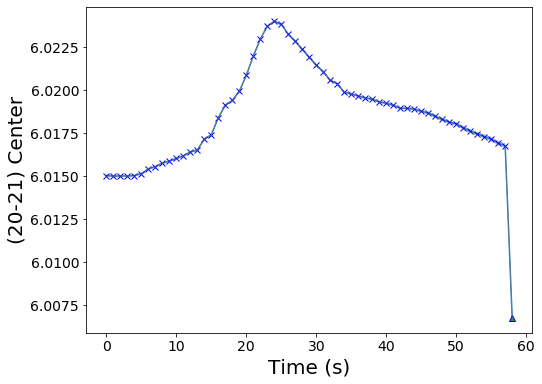

In [503]:
experiment.plot_fit_parameter("(10-10)", "(10-10)_center", show_points=True)
experiment.plot_fit_parameter("(111)", "(111)_center", show_points=True)
experiment.plot_fit_parameter("(0002)", "(0002)_center", show_points=True)
experiment.plot_fit_parameter("(10-11)", "(10-11)_center", show_points=True)
experiment.plot_fit_parameter("(10-12)", "(10-12)_center", show_points=True)
experiment.plot_fit_parameter("(220)", "(220)_center", show_points=True)
experiment.plot_fit_parameter("(11-20)", "(11-20)_center", show_points=True)
experiment.plot_fit_parameter("(10-13)", "(10-13)_center", show_points=True)
experiment.plot_fit_parameter("(311)", "(311)_center", show_points=True)
experiment.plot_fit_parameter("(20-20)", "(20-20)_center", show_points=True)
experiment.plot_fit_parameter("(11-22)", "(11-22)_center", show_points=True)
experiment.plot_fit_parameter("(20-21)", "(20-21)_center", show_points=True)
# experiment.plot_fit_parameter("(0004)", "(0004)_center", show_points=True)
# experiment.plot_fit_parameter("(20-22)", "(20-22)_center", show_points=True)

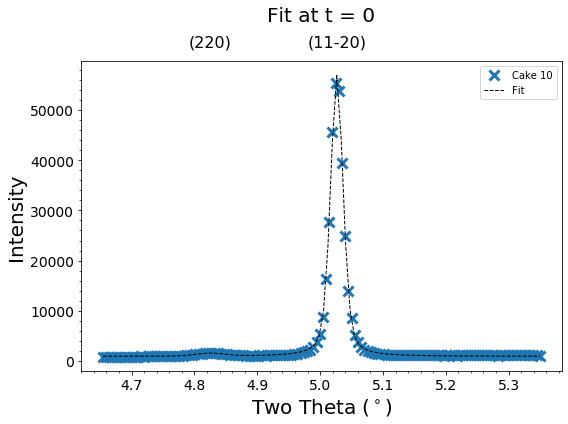

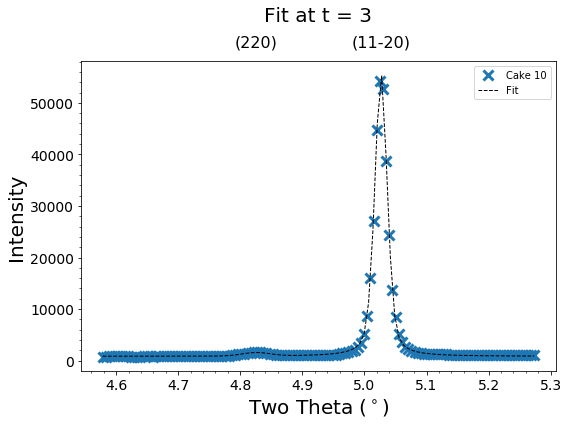

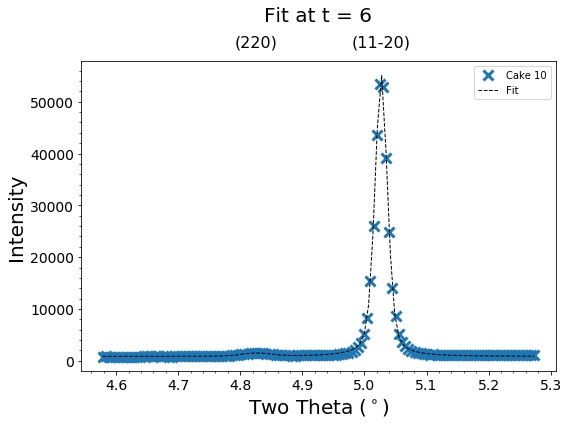

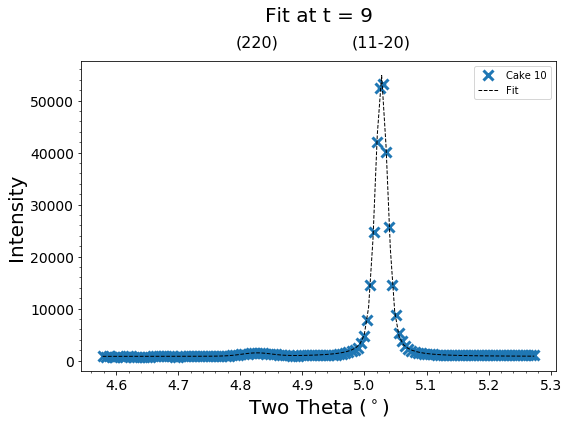

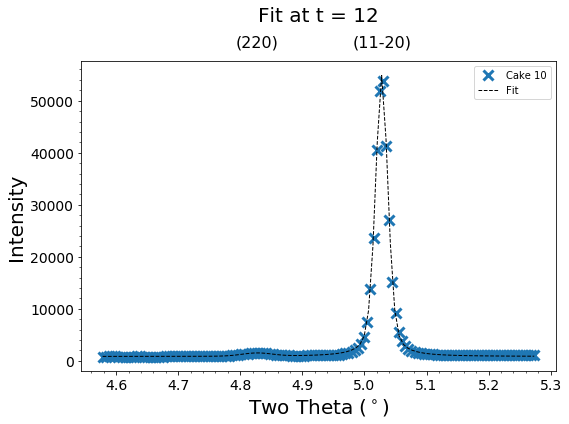

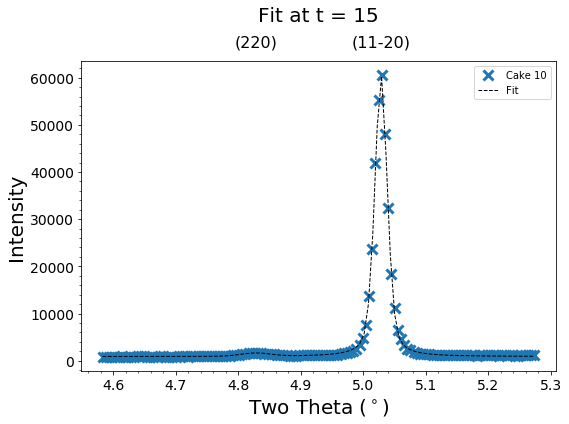

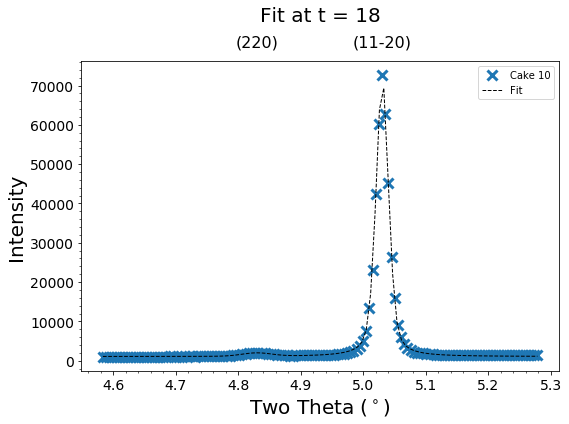

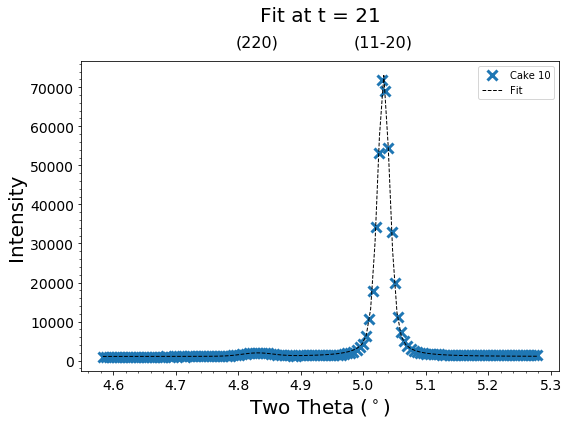

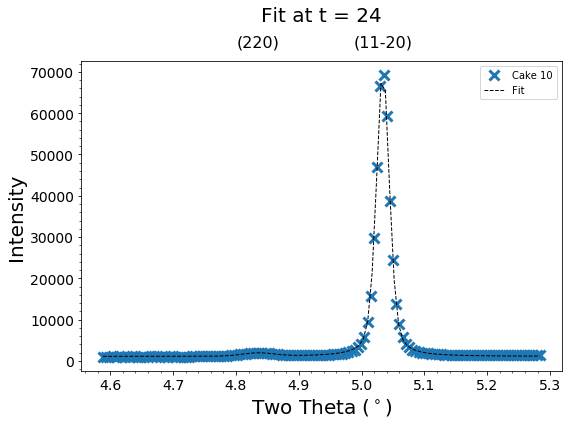

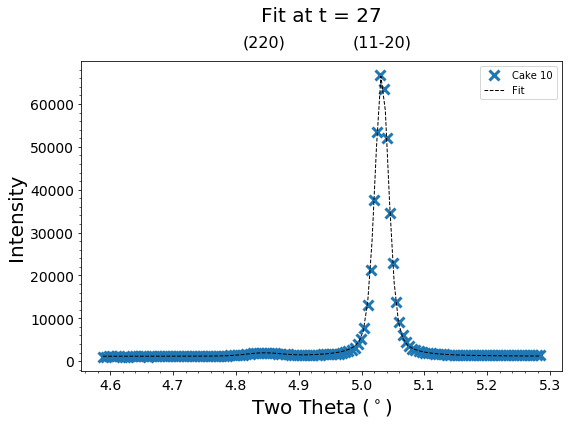

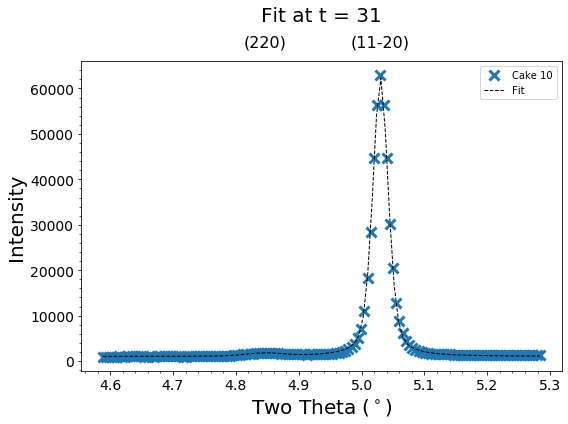

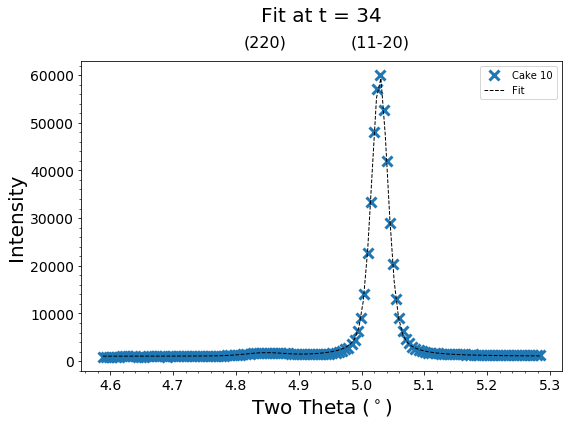

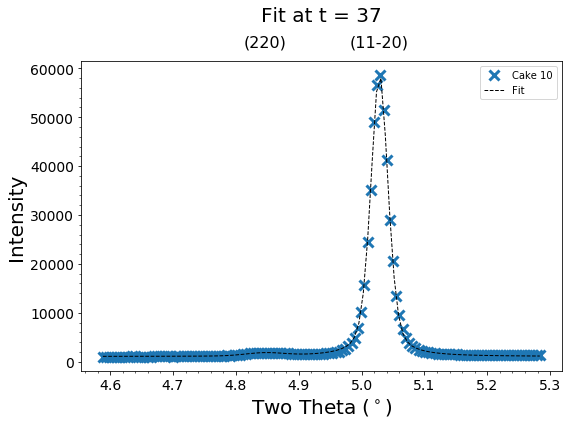

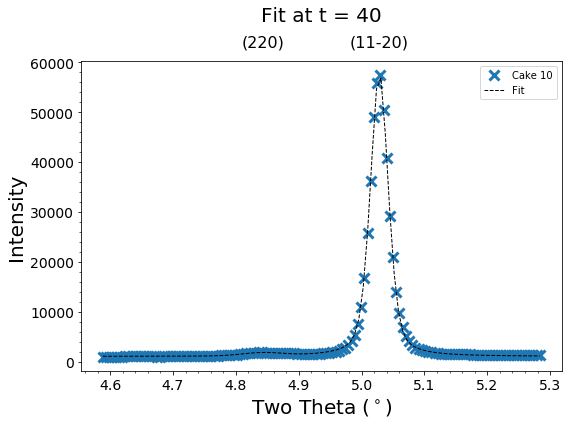

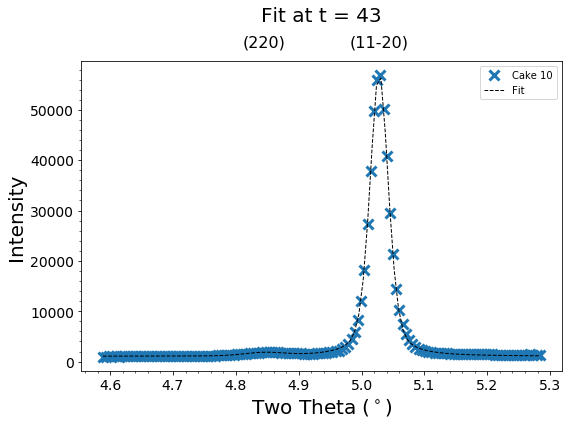

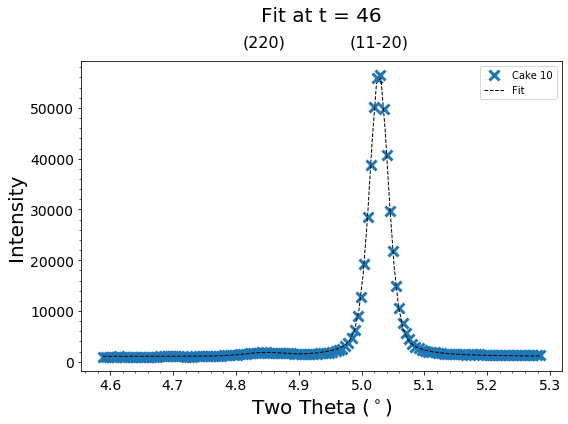

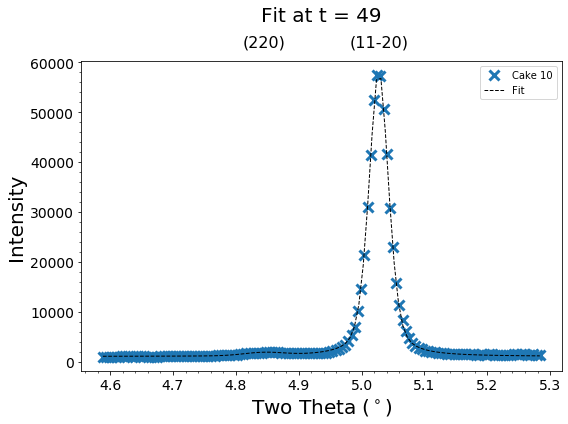

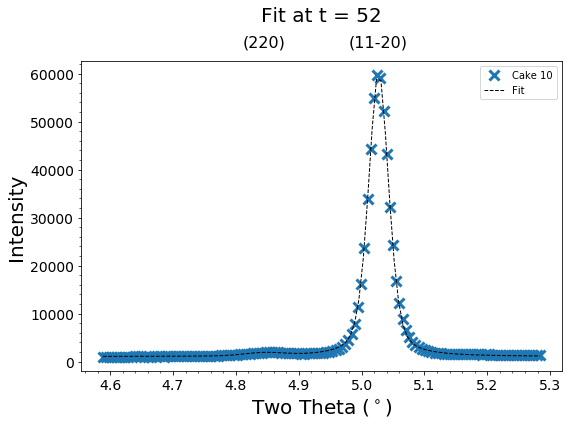

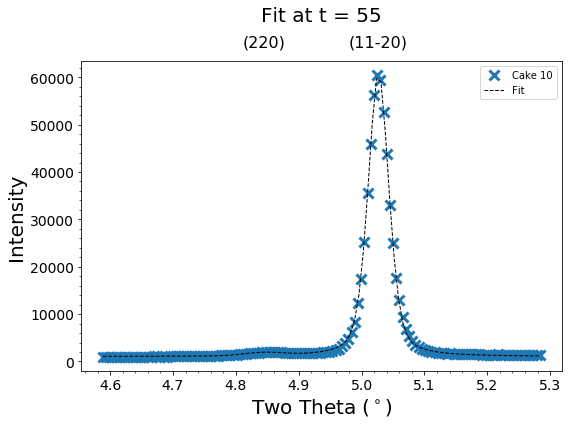

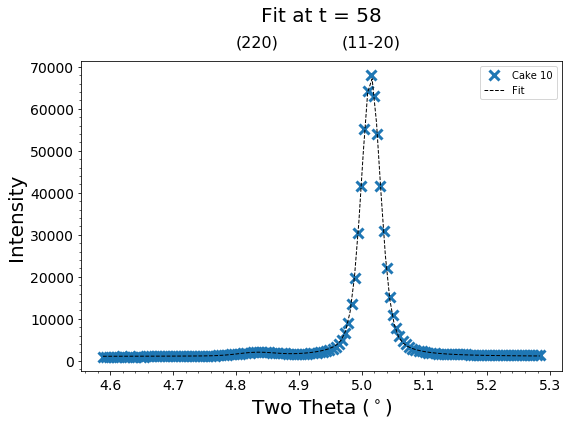

In [504]:
experiment.plot_fits(peak_names=["(220)"], num_time_steps=20)

## Save the fits

In [506]:
experiment.save("experiment_fits/xrdfit_sample_2_tension_cake10.dump")

Saving data to dump file.
Data successfully saved to dump file.


## Run refinements for all cakes

In [510]:
cake_list = list(range(3,8,1))
print(cake_list)

[3, 4, 5, 6, 7]


In [511]:
# give the frame time in seconds
frame_time = 1
# define the file path
file_string = '../data/sample_2_tension/Strain_{:05d}.dat'
# set merge cakes to false for multiple points
merge_cakes = False

# define which frames to fit
frames_to_fit = list(range(0, 59, 1))

In [513]:
for cake in cake_list:
    cakes_to_fit = [cake]
    experiment = FitExperiment(frame_time, file_string, first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)
    # reuse fits for multiple peaks
    experiment.run_analysis(reuse_fits=True)
    experiment.save(f"experiment_fits/xrdfit_sample_2_tension_cake{cake:02d}.dump")

Processing 59 diffraction patterns.



Analysis complete.
The following fits took over 500 fitting iterations. The quality of these fits should be checked.
3.4% of fits for peak (10-10) (111)
1.7% of fits for peak (0002)
1.7% of fits for peak (220) (11-20)
62.7% of fits for peak (10-13) (311) (20-20) (11-22) (20-21)
Saving data to dump file.
Data successfully saved to dump file.
Processing 59 diffraction patterns.



Analysis complete.
The following fits took over 500 fitting iterations. The quality of these fits should be checked.
20.3% of fits for peak (10-10) (111)
49.2% of fits for peak (10-13) (311) (20-20) (11-22) (20-21)
Saving data to dump file.
Data successfully saved to dump file.
Processing 59 diffraction patterns.



Analysis complete.
The following fits took over 500 fitting iterations. The quality of these fits should be checked.
33.9% of fits for peak (10-10) (111)
39.0% of fits for peak (10-13) (311) (20-20) (11-22) (20-21)
Saving data to dump file.
Data successfully saved to dump file.
Processing 59 diffraction patterns.



Analysis complete.
The following fits took over 500 fitting iterations. The quality of these fits should be checked.
6.8% of fits for peak (10-10) (111)
37.3% of fits for peak (10-13) (311) (20-20) (11-22) (20-21)
Saving data to dump file.
Data successfully saved to dump file.
Processing 59 diffraction patterns.



Analysis complete.
The following fits took over 500 fitting iterations. The quality of these fits should be checked.
3.4% of fits for peak (220) (11-20)
50.8% of fits for peak (10-13) (311) (20-20) (11-22) (20-21)
Saving data to dump file.
Data successfully saved to dump file.


Check the fittings for the final cake:

*Note, you could include the plot_fit_parameter commands in the above loop to plot the refinements for each cake*

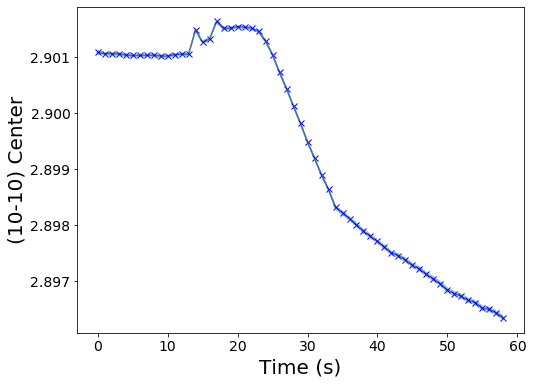

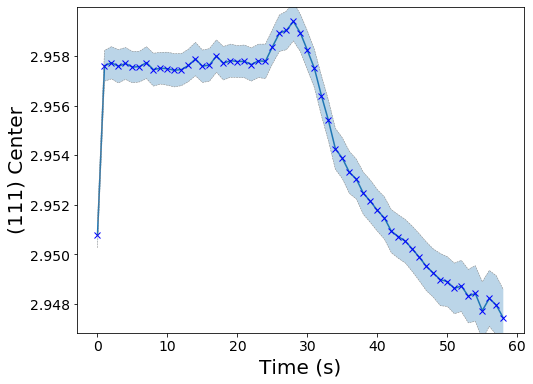

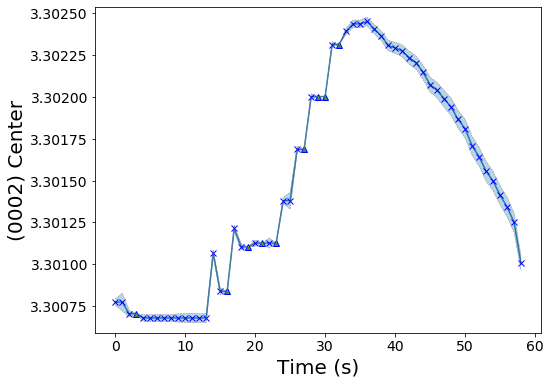

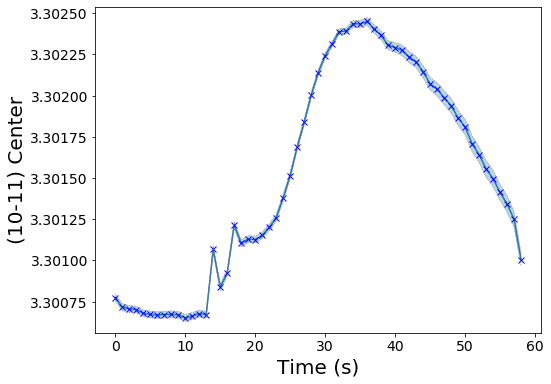

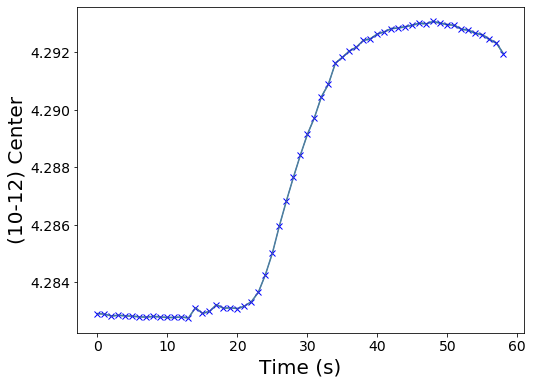

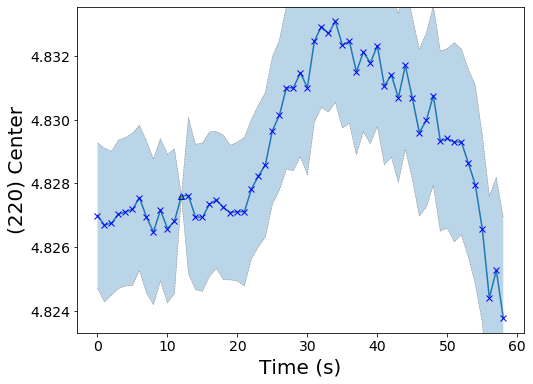

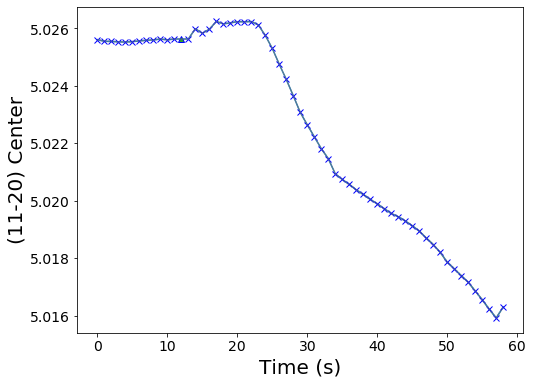

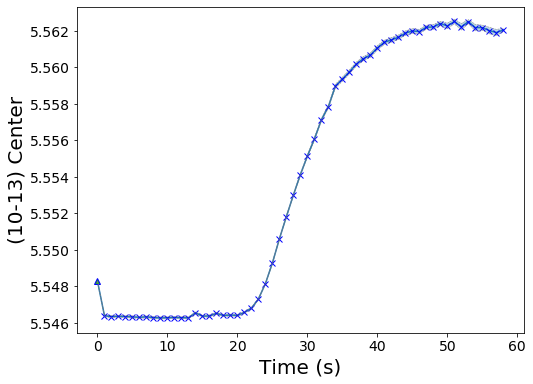

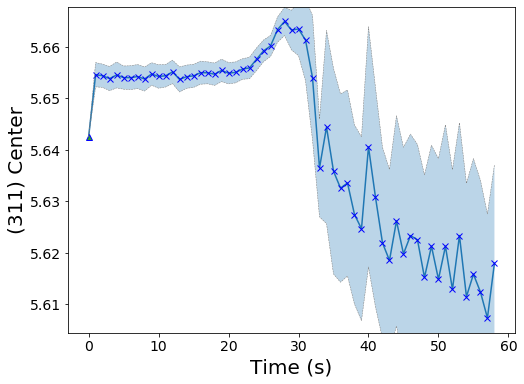

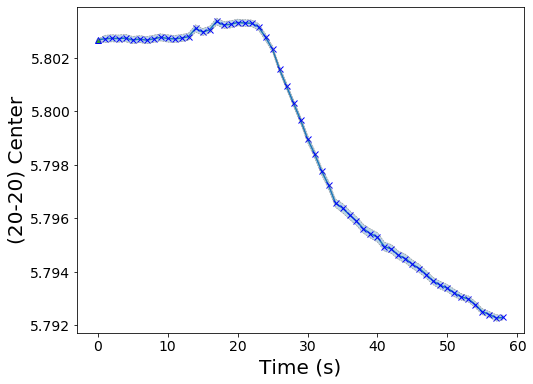

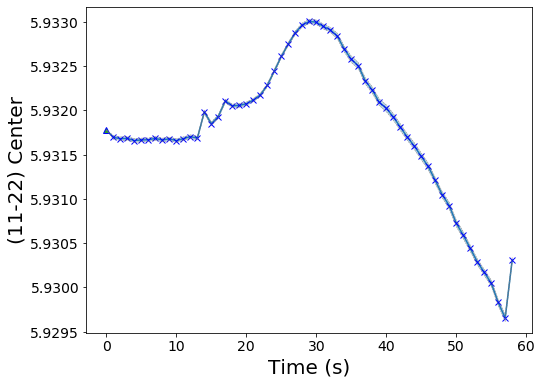

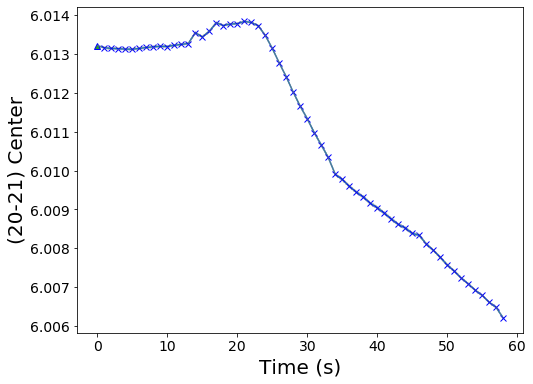

In [517]:
experiment.plot_fit_parameter("(10-10)", "(10-10)_center", show_points=True)
experiment.plot_fit_parameter("(111)", "(111)_center", show_points=True)
experiment.plot_fit_parameter("(0002)", "(0002)_center", show_points=True)
experiment.plot_fit_parameter("(10-11)", "(10-11)_center", show_points=True)
experiment.plot_fit_parameter("(10-12)", "(10-12)_center", show_points=True)
experiment.plot_fit_parameter("(220)", "(220)_center", show_points=True)
experiment.plot_fit_parameter("(11-20)", "(11-20)_center", show_points=True)
experiment.plot_fit_parameter("(10-13)", "(10-13)_center", show_points=True)
experiment.plot_fit_parameter("(311)", "(311)_center", show_points=True)
experiment.plot_fit_parameter("(20-20)", "(20-20)_center", show_points=True)
experiment.plot_fit_parameter("(11-22)", "(11-22)_center", show_points=True)
experiment.plot_fit_parameter("(20-21)", "(20-21)_center", show_points=True)
# experiment.plot_fit_parameter("(0004)", "(0004)_center", show_points=True)
# experiment.plot_fit_parameter("(20-22)", "(20-22)_center", show_points=True)

## Reload the data

In [518]:
experiment = spectrum_fitting.load_dump("experiment_fits/xrdfit_sample_2_tension_cake01.dump")

Loading data from dump file.
Data successfully loaded from dump file.


Check which peaks have been analysed:

In [519]:
experiment.peak_names()

['(10-10) (111)',
 '(0002)',
 '(10-11)',
 '(10-12)',
 '(220) (11-20)',
 '(10-13) (311) (20-20) (11-22) (20-21)']

Define a peak list from the peak names to plot the data:

In [538]:
# full_peak_list='(10-10)','(111)','(0002)','(10-11)','(10-12)','(220)','(11-20)','(10-13)','(311)','(20-20)','(11-22)','(20-21)','(0004)','(20-22)'
full_peak_list='(10-10)','(111)','(0002)','(10-11)','(10-12)','(220)','(11-20)','(10-13)','(311)','(20-20)','(11-22)','(20-21)'
reduced_peak_list='(10-10)','(111)','(0002)','(10-11)','(10-12)','(220)','(11-20)', '(311)',

## Reload the data for a number of cakes

In [522]:
cake_list = list(range(3,8,1))
print(cake_list)

[3, 4, 5, 6, 7]


In [529]:
experiments=dict()

for cake in cake_list:
    experiment_name = f"cake{cake:02d}"
    experiments[experiment_name] = spectrum_fitting.load_dump(f"experiment_fits/xrdfit_sample_2_tension_cake{cake:02d}.dump")

cake03
Loading data from dump file.
Data successfully loaded from dump file.
cake04
Loading data from dump file.
Data successfully loaded from dump file.
cake05
Loading data from dump file.
Data successfully loaded from dump file.
cake06
Loading data from dump file.
Data successfully loaded from dump file.
cake07
Loading data from dump file.
Data successfully loaded from dump file.


In [535]:
experiments['cake03'].peak_names()

['(10-10) (111)',
 '(0002)',
 '(10-11)',
 '(10-12)',
 '(220) (11-20)',
 '(10-13) (311) (20-20) (11-22) (20-21)']

## Set the colour and marker scheme

Colour and marker scheme:

Alpha phase uses discretised viridis colour scheme:

In [35]:
N=9
colour_range(N)

['#fde725',
 '#addc30',
 '#5ec962',
 '#28ae80',
 '#21918c',
 '#2c728e',
 '#3b528b',
 '#472d7b',
 '#440154']

Hydride phase uses adjusted colour scheme from https://learnui.design/tools/data-color-picker.html#palette with 5 colours chosen.

This gives the combined colour scheme for each lattice plane:

In [541]:
plane_colour = {
'(10-10)' : '#fde725',
'(0002)' : '#addc30',
'(10-11)' : '#5ec962',
'(10-12)' : '#28ae80',
'(11-20)' : '#21918c',
'(10-13)' : '#2c728e',
'(20-20)' : '#3b528b',
'(11-22)' : '#472d7b',
'(20-21)' : '#440154',
'(111)' : '#ff6361',
'(220)' : '#bc5090',
'(311)' : '#58508d',
}

The marker scheme for each lattice plane is given here:

In [542]:
plane_marker = {
'(10-10)' : 's', #square
'(0002)' : 'H', #hexagon
'(10-11)' : '^', #ltriangle - up
'(10-12)' : 'v', #ytriangle - down
'(11-20)' : 'D', #diamond
'(10-13)' : '<', #triangle - left
'(20-20)' : 'd', #thin diamond
'(11-22)' : '*', #star
'(20-21)' : 'o', #circle
'(111)' : '+', #plus
'(220)' : 'x', #cross
'(311)' : 'X', #cross (filled)
#'(220)' : 'P', #plus (filled)
}

## Synchronise the Instron data

Load the instrument data recorded with each of the diffraction pattern images:

*Note, each point corresponds to a diffraction image

59


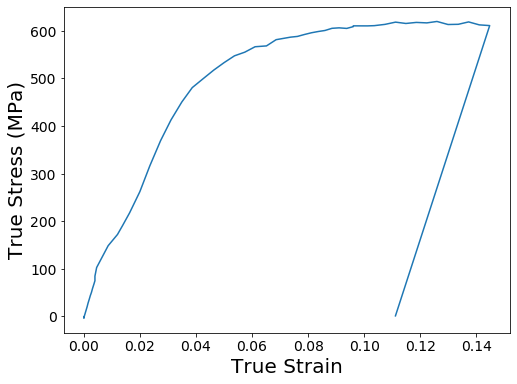

In [546]:
# file_path_instrument_data = "../data/Instron_data/Instron_sample_2_tension.txt"
instrument_data = np.loadtxt(file_path_instrument_data)
stress = instrument_data[:, 0]
strain = instrument_data[:, 1]

plt.plot(strain, stress)
plt.xlabel("True Strain")
plt.ylabel("True Stress (MPa)")
plt.show()

## Plotting the SXRD data

Grab the center, amplitude and fwhm data for each of the lattice plane peaks, for each of the cakes. Note, these arrays, contain time in the first column, the parameter in the second column and the error in the third column:

In [548]:
for cake in cake_list:
    peak_center[f"cake{cake:02d}"]=dict()
    peak_amplitude[f"cake{cake:02d}"]=dict()
    peak_fwhm[f"cake{cake:02d}"]=dict()
    
    for peak_name in full_peak_list:
        peak_center[f"cake{cake:02d}"][peak_name]=experiments[f"cake{cake:02d}"].get_fit_parameter(peak_name, f"{peak_name}_center")
        peak_amplitude[f"cake{cake:02d}"][peak_name]=experiments[f"cake{cake:02d}"].get_fit_parameter(peak_name, f"{peak_name}_amplitude")
        peak_fwhm[f"cake{cake:02d}"][peak_name]=experiments[f"cake{cake:02d}"].get_fit_parameter(peak_name, f"{peak_name}_fwhm")

In [552]:
print(peak_center['cake03']['(10-10)'])

[[0.00000000e+00 2.89932039e+00 2.26689610e-05]
 [1.00000000e+00 2.89927094e+00 2.18381973e-05]
 [2.00000000e+00 2.89927238e+00 2.18524382e-05]
 [3.00000000e+00 2.89923978e+00 2.19456228e-05]
 [4.00000000e+00 2.89919841e+00 2.21275064e-05]
 [5.00000000e+00 2.89907735e+00 2.23504933e-05]
 [6.00000000e+00 2.89871278e+00 2.24185067e-05]
 [7.00000000e+00 2.89855000e+00 2.16929928e-05]
 [8.00000000e+00 2.89830586e+00 2.24880460e-05]
 [9.00000000e+00 2.89815622e+00 2.17031924e-05]
 [1.00000000e+01 2.89795572e+00 2.22851011e-05]
 [1.10000000e+01 2.89779159e+00 2.23528228e-05]
 [1.20000000e+01 2.89758869e+00 2.22140836e-05]
 [1.30000000e+01 2.89742540e+00 2.20573830e-05]
 [1.40000000e+01 2.89724046e+00 2.24841966e-05]
 [1.50000000e+01 2.89667089e+00 2.27383027e-05]
 [1.60000000e+01 2.89558847e+00 2.25232039e-05]
 [1.70000000e+01 2.89514293e+00 2.32030652e-05]
 [1.80000000e+01 2.89463354e+00 2.34110454e-05]
 [1.90000000e+01 2.89401862e+00 2.35989057e-05]
 [2.00000000e+01 2.89292135e+00 2.386120

Plot the micromechanical strain partitioning (true stress versus microstrain):

0.025300819749165503
0.02579434543641721
0.02879112702159866
0.03735871791688865
0.04218381801771216
0.04383453778701875
0.04945950624298595


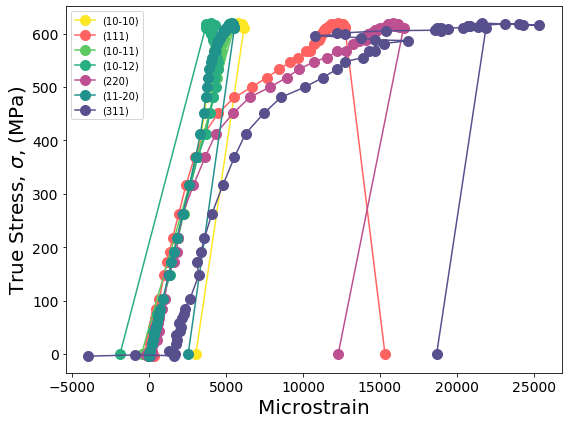

In [578]:
cake = 'cake03'

for peak_name in reduced_peak_list:
    if peak_name != '(0002)':
        microstrain = calc_strain(peak_center[cake][peak_name][0:, 1], 5)*1e6
    #     microstrain = medfilt(microstrain,15)
        plt.plot(microstrain,stress,'-o',color=plane_colour[peak_name],markersize=10,label=peak_name)
        plt.legend()
        plt.ylabel('True Stress, ${\sigma}$, (MPa)')
        plt.xlabel('Microstrain')

plt.tight_layout()
save_plot_path='plots/sample_2_tension_' + cake + '_strain_partitioning'
plt.savefig(save_plot_path, format='eps')